## Homework 2
## Paul Casey

## 1)i Which of the following answers is correct and why is it correct?

* a) For a fixed value of IQ and GPA, males earn more on average than females.
* (b) For a fixed value of IQ and GPA, females earn more on average than males.
* (c) For a fixed value of IQ and GPA, males earn more on average than females provided
  that the GPA is high enough.
* (d) For a fixed value of IQ and GPA, females earn more on average than males provided
that the GPA is high enough.

*The code below establishes the variables and linear regression equation.

In [1]:
# Variables
GPA = 4.0
IQ = 200
Gender = 1
GPA_IQ = Gender * IQ
GPA_Gender = GPA*Gender

# Linear Equation
starting_salary = 50+20*(GPA)+.07*(IQ)+35*(Gender)+.01*(GPA_IQ)-10*(GPA_Gender)
print(starting_salary)

141.0



* We will start out by testing different values for IQ and GPA for both males and females.

In [2]:
# Very high GPA and IQ
GPA = 4.0
IQ = 200
Gender = 1
GPA_IQ = Gender * IQ
GPA_Gender = GPA*Gender
starting_salary = 50+20*(GPA)+.07*(IQ)+35*(Gender)+.01*(GPA_IQ)-10*(GPA_Gender)
print(f'Female with 4.0 and IQ of 200 starting salary in thousands: {starting_salary:.2f}')

Female with 4.0 and IQ of 200 starting salary in thousands: 141.00


In [3]:
#gender as well as gpa_gender drop out because it is a male.
GPA = 4.0
IQ = 200
Gender = 0
GPA_IQ = Gender * IQ
GPA_Gender = GPA*Gender
starting_salary = 50+20*(GPA)+.07*(IQ)+35*(Gender)+.01*(GPA_IQ)-10*(GPA_Gender)
print(f'Male with 4.0 and IQ of 200 starting salary in thousands: {starting_salary:.2f}')

Male with 4.0 and IQ of 200 starting salary in thousands: 144.00


In [4]:
# Mid Range
GPA = 3.0
IQ = 100
Gender = 1
GPA_IQ = Gender * IQ
GPA_Gender = GPA*Gender
starting_salary = 50+20*(GPA)+.07*(IQ)+35*(Gender)+.01*(GPA_IQ)-10*(GPA_Gender)
print(f'Female with 3.0 and IQ of 100 starting salary in thousands: {starting_salary:.2f}')

Female with 3.0 and IQ of 100 starting salary in thousands: 123.00


In [5]:
GPA = 3.0
IQ = 100
Gender = 0
GPA_IQ = Gender * IQ
GPA_Gender = GPA*Gender
starting_salary = 50+20*(GPA)+.07*(IQ)+35*(Gender)+.01*(GPA_IQ)-10*(GPA_Gender)
print(f'Male with 3.0 and IQ of 100 starting salary in thousands: {starting_salary:.2f}')

Male with 3.0 and IQ of 100 starting salary in thousands: 117.00


* We could continue to go on with more examples, but if we look at our linear equation we should be able to make some conclusions based upon the results we have seen. The dummy variable gender gives females an increase of 35 all else remaining the same, but there is a negaive interaction variable for females only (GPA_Gender) that as their gpa increases, this variable becomes a larger negative number. This makes sense becuase we saw that when gpas and iqs were very high, males earned more, but as the gpa and iq dropped, so did the salary for both of them, but more so for males. 
## The correct answer for #1i is c.
*  For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

## 1)ii Predict the salary of a female with IQ of 110 and a GPA of 4.0


In [6]:
# All we need to do is plug in the numbers given because the equation is already established. 
GPA = 4.0
IQ = 110
Gender = 1
GPA_IQ = Gender * IQ
GPA_Gender = GPA*Gender
starting_salary = 50+20*(GPA)+.07*(IQ)+35*(Gender)+.01*(GPA_IQ)-10*(GPA_Gender)
print(f'Female with 3.0 and IQ of 110 starting salary in thousands: {starting_salary:.2f}')

Female with 3.0 and IQ of 110 starting salary in thousands: 133.80


## 1)iii True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

* This is false. We cannot determine this without the pvalue of this interaction term. The hypothesis test of the pvalue is if this interaction variable has any effect on the output variable. The null is that the coeffecient of this term should be 0 and although our coefficient for this variable is close to zero, we cannot assume that its impact on the model is null. 

## 2)ia Use TV as a predictor and sales as a response. Write the regression equation. Predict the sales for the TV advertisement expenses of 137.

In [7]:
# import the libraries and packages required for analysis 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
%matplotlib inline
import statsmodels.api as sm

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',3000)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

C:\Users\Katabatic\AppData\Local\Temp\ipykernel_20600\2949747405.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # a style that can be used for plots - see style reference above


* The code below reads in the data and prints the first five rows of our table.

In [8]:
df_advert = pd.read_csv(r"C:\Users\Katabatic\Desktop\DATA 3550\Advertising.csv", index_col = 0, header = 0)
df_advert.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
#this will print the shape of the matrix
#I want to make sure that my train and test data set get split appropriately
df_advert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


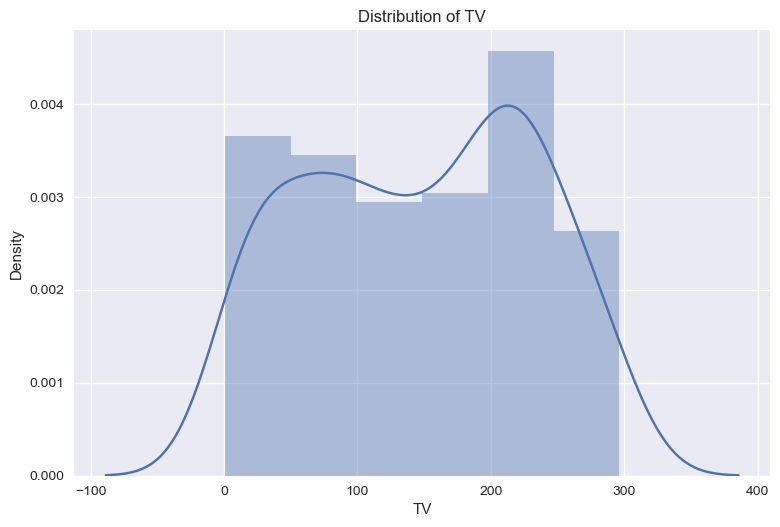

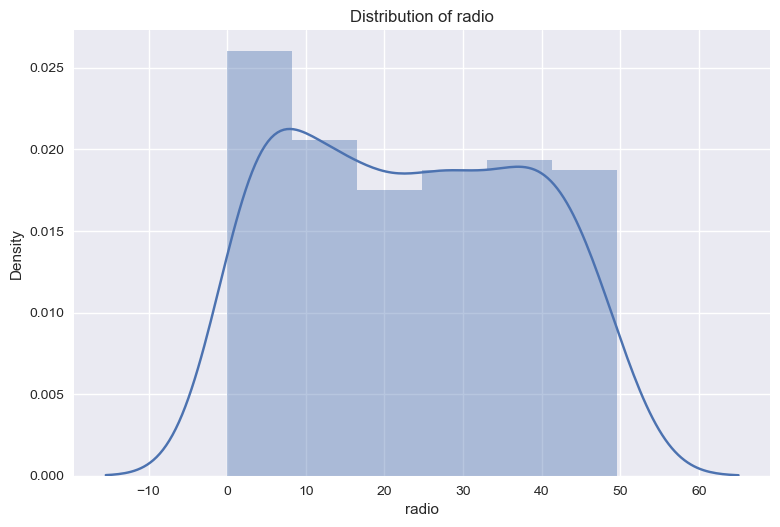

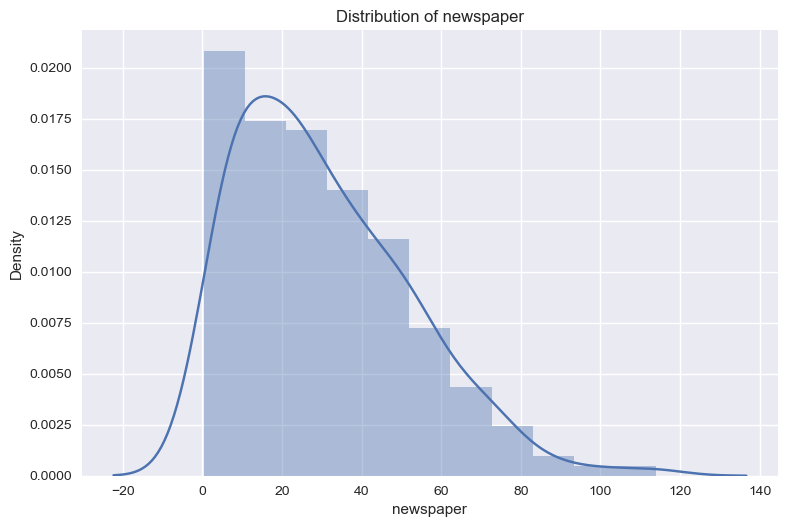

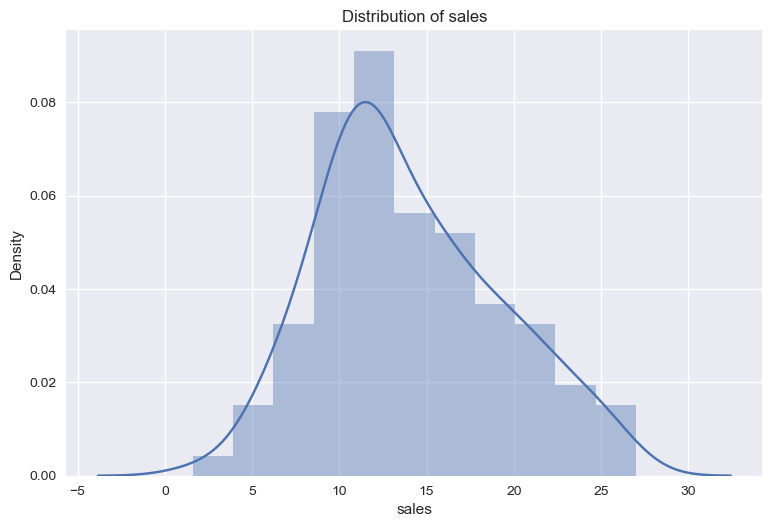

In [10]:
# To create a distribution plot
print(df_advert.columns)

# Write a function to create a distribution plot
def distribution_plot(dataframe):
    
    for col in df_advert.columns:
        sns.distplot(df_advert[col])
        plt.title(f"Distribution of {col}")
        plt.show()
        
#create the plot       
distribution_plot(df_advert)  

* Looking at our distribution plots, I don't think we need to transform any of the data besides newspaper. We appear to have relatively normal distributions (newspaper has right skew though) of each predictor, but we can see if a standard scaler will help. Linear regression handles skew relatively well, but lets see if we logging or rooting it can help.

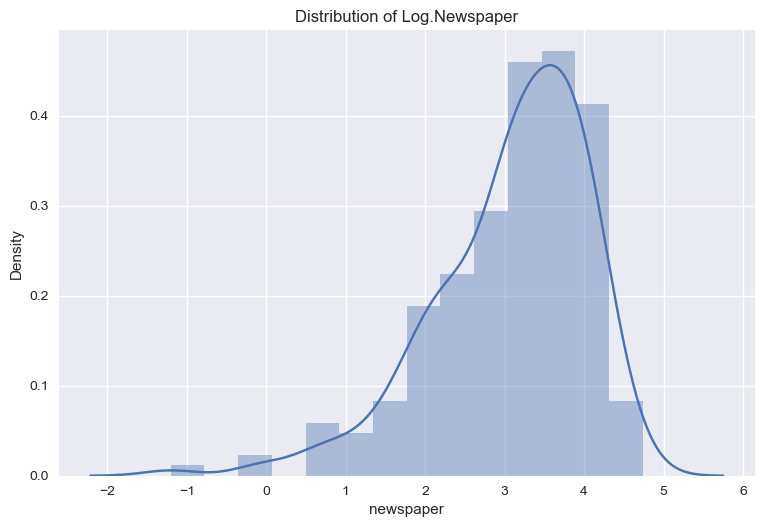

In [11]:
# try and transform the newspaper to be more semetric
log_newspaper = np.log(df_advert['newspaper'])
sns.distplot(log_newspaper)
plt.title(f"Distribution of Log.Newspaper")
plt.show()

* Logging is better than before, but lets try rooting it. 

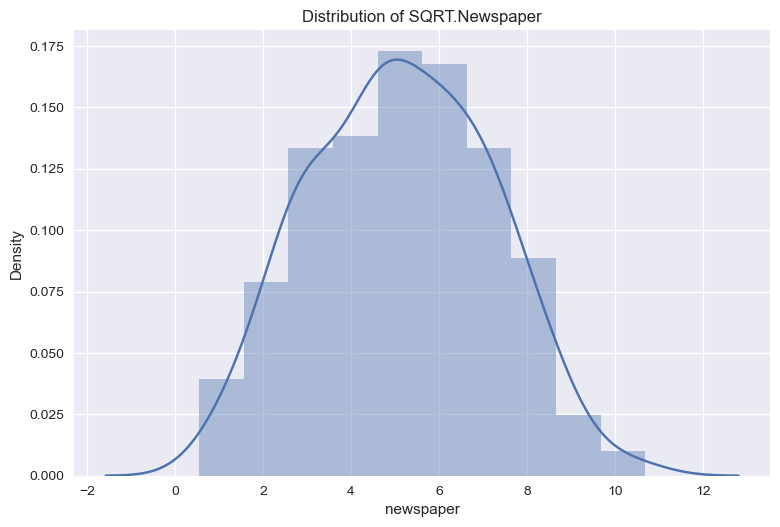

In [12]:
# try and transform the newspaper to be more semetric
sqrt_newspaper = np.sqrt(df_advert['newspaper'])
sns.distplot(sqrt_newspaper)
plt.title(f"Distribution of SQRT.Newspaper")
plt.show()

In [13]:
#remove column newspaper since were going to use sqrt newspaper
df_advert['sqrt_newspaper'] = np.sqrt(df_advert['newspaper'])
df_advert.drop('newspaper', axis=1, inplace = True)
print(df_advert.head())

      TV  radio  sales  sqrt_newspaper
1  230.1   37.8   22.1        8.318654
2   44.5   39.3   10.4        6.715653
3   17.2   45.9    9.3        8.324662
4  151.5   41.3   18.5        7.648529
5  180.8   10.8   12.9        7.641989


* This distribution looks much better. We need to remember to undo the sqaureroot when interpreting the coefficents. 

In [14]:
#import data scaling libraries and packages.
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer, StandardScaler

#assign to variables so it is easier to implement in code
sc = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()
nm = Normalizer()

In [15]:
#establish predictor and response variable
X = df_advert[['TV','sqrt_newspaper', 'radio']]
y = df_advert['sales']


In [16]:
#split the train test, here we are doing a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#fit the data i.e., calculate the mean and sd of each column of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

<Axes: title={'center': 'After Standard Scaler'}, xlabel='TV', ylabel='Density'>

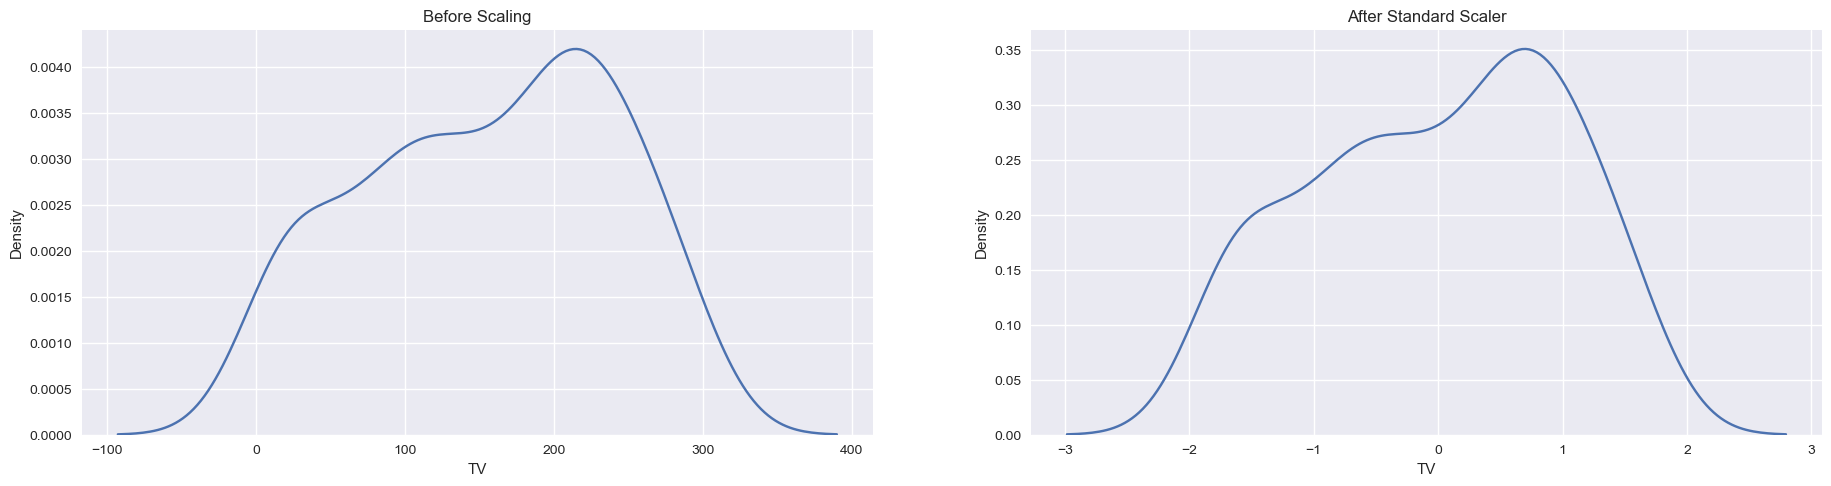

In [17]:
# do we need to scale the data? 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['TV'], ax=ax1)


ax2.set_title('After Standard Scaler')
sns.kdeplot(X_train_sc['TV'], ax=ax2)

* We do not need to scale. We still have a relatively normal distribution before scaling (exactly the same as after scaling with sc) and interpreting our coefficients will be easier if we do not scale. I understand there are other scalers that could help, but the distribution is close to normal.

In [18]:
#reset the indices to ensure they match
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)




In [19]:
#fit the linear model
X_train = sm.add_constant(X_train)
lm_tv = sm.OLS(y_train, X_train).fit()
print(lm_tv.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.88e-69
Time:                        14:59:40   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5403      0.462      5.

* From this summary, we can build the equation. It is sales = 7.2395 + .0464 * TV

In [20]:
TV = 137
sales = 7.2395 + .0464 * TV
print(f'Predicted sales with TV of 137: {sales:.2f}')

Predicted sales with TV of 137: 13.60


* Our predicted sales at 137 as show above is 13.60

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

#make predictions on the test data
X_test = sm.add_constant(X_test)
y_pred = lm_tv.predict(X_test)

#calculate evaluation metrics for the testing data
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on Test Data: {mse}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")
print(f"R-squared (R2) on Test Data: {r2}")

Mean Squared Error (MSE) on Test Data: 3.7571557958037585
Root Mean Squared Error (RMSE) on Test Data: 1.9383384110633928
R-squared (R2) on Test Data: 0.8623984731831131


* This is very rare that our model has a higher R squared on our testing dataset than our training data. 

## 2)ib  Use radio as a predictor and sales as a response. Write the regression equation. Predict the sales for the radio advertisement expenses of 10.

In [22]:
#establish x to be radio
X = df_advert[['radio']]

In [23]:
#split the train test, here we are doing a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#reset the indices to ensure they match
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)


#fit the linear model
X_train = sm.add_constant(X_train)
lm_radio = sm.OLS(y_train, X_train).fit()
print(lm_radio.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     88.10
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.72e-16
Time:                        14:59:40   Log-Likelihood:                -392.80
No. Observations:                 140   AIC:                             789.6
Df Residuals:                     138   BIC:                             795.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3389      0.647     14.443      0.0

In [24]:
#our model equation is sales = 9.3389 + .2193(radio)
radio = 10
sales = 9.3389 + .2193 * radio
print(f'Predicted sales with a radio of 10: {sales:.2f}')

Predicted sales with a radio of 10: 11.53


* Our predicted sales when radio is 10 is 11.53.

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

#make predictions on the test data
X_test = sm.add_constant(X_test)
y_pred = lm_radio.predict(X_test)

#calculate evaluation metrics for the testing data
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on Test Data: {mse}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")
print(f"R-squared (R2) on Test Data: {r2}")

Mean Squared Error (MSE) on Test Data: 23.723146496580334
Root Mean Squared Error (RMSE) on Test Data: 4.870641281862208
R-squared (R2) on Test Data: 0.13116693684196767


* Our R squared had a significant drop off on the testing data. This isn't really a surprise since the R squared in our training data wasn't very high meaning that our model does not do the best at explaining the variablility of the target variable. 

## 2)ic  Use newspaper as a predictor and sales as a response. Write the regression equation. Predict the sales for the newspaper advertisement expenses of 137.

In [26]:

X = df_advert[['sqrt_newspaper']]
y = df_advert['sales']


#split the train test, here we are doing a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#reset the indices to ensure they match
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)


#fit the linear model
X_train = sm.add_constant(X_train)
lm_newspaper = sm.OLS(y_train, X_train).fit()
print(lm_newspaper.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     6.029
Date:                Sun, 22 Oct 2023   Prob (F-statistic):             0.0153
Time:                        14:59:40   Log-Likelihood:                -424.37
No. Observations:                 140   AIC:                             852.7
Df Residuals:                     138   BIC:                             858.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.7819      1.185      9.

* The linear model for the newspaper model is sales = 11.7819 + (.5275)^2 * newspaper

In [27]:
#predict using the .predict() instead of manually
newspaper = 137

#apply the square root transformation
sqrt_newspaper = np.sqrt(newspaper)

#use the linear regression model to predict sales
sales = lm_newspaper.predict([1, sqrt_newspaper])[0]

print(f'Predicted sales for newspaper budget of 137: {sales:.2f}')

Predicted sales for newspaper budget of 137: 17.96


* Our predicted sales when newspaper is 137 is 17.96

In [28]:
# Make predictions on the test data
X_test = sm.add_constant(X_test)
y_pred = lm_newspaper.predict(X_test)

# Calculate evaluation metrics for the testing data
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on Test Data: {mse}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")
print(f"R-squared (R2) on Test Data: {r2}")

Mean Squared Error (MSE) on Test Data: 28.5738587947644
Root Mean Squared Error (RMSE) on Test Data: 5.345452159992118
R-squared (R2) on Test Data: -0.04648484409430531


* I didn't think a negative R squared value was possible, so I looked it up and if the model had a poor R squared on the training data, it is possible for the Rsquared to be negative on the testing dataset. 

## 2)id In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

ValueError: shapes (200,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

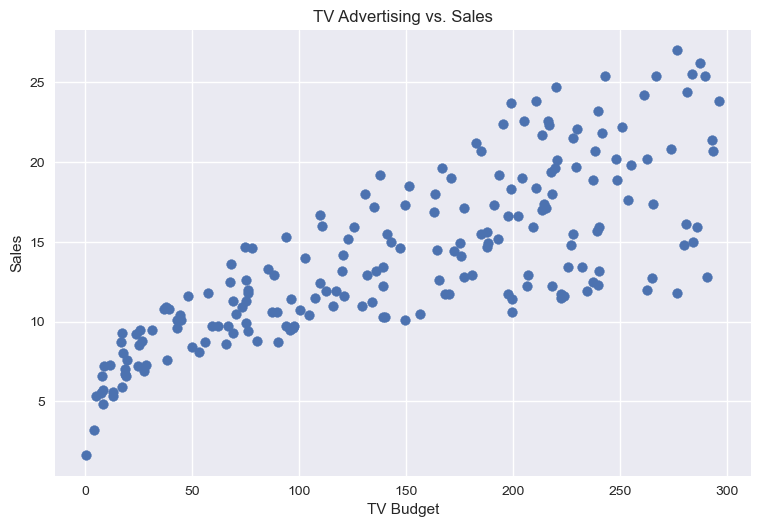

In [29]:
# let's see if there is a linear relationship between TV and sales
plt.scatter(df_advert['TV'],df_advert['sales'])
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.title('TV Advertising vs. Sales')

# add my regression model
x = df_advert['TV']
y_pred = lm_tv.predict(sm.add_constant(x))
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression')


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

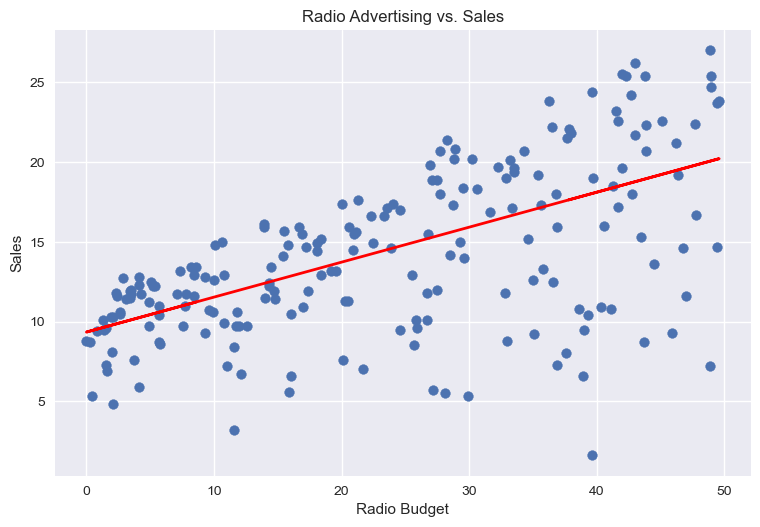

In [30]:
# let's see if there is a linear relationship between Radio and sales
plt.scatter(df_advert['radio'],df_advert['sales'])
plt.xlabel('Radio Budget')
plt.ylabel('Sales')
plt.title('Radio Advertising vs. Sales')

# add my regression model
x = df_advert['radio']
y_pred = lm_radio.predict(sm.add_constant(x))
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

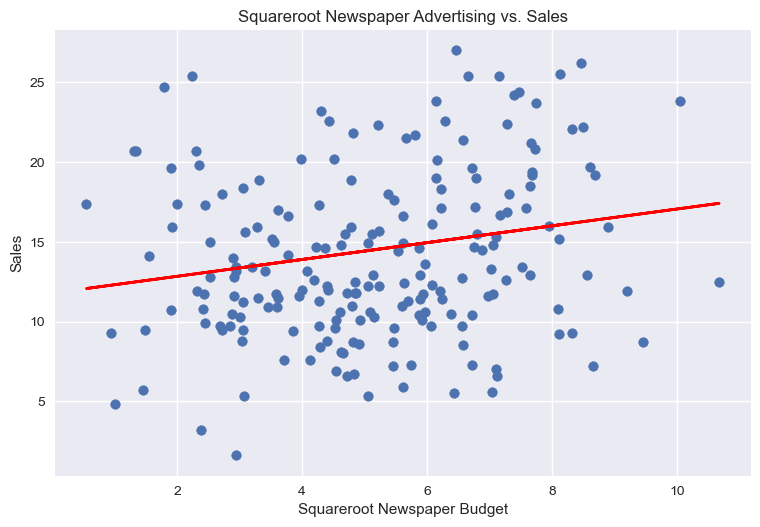

In [31]:
# let's see if there is a linear relationship between newspaper and sales
plt.scatter(df_advert['sqrt_newspaper'],df_advert['sales'])
plt.xlabel('Squareroot Newspaper Budget')
plt.ylabel('Sales')
plt.title('Squareroot Newspaper Advertising vs. Sales')

# add my regression model
x = df_advert['sqrt_newspaper']
y_pred = lm_newspaper.predict(sm.add_constant(x))
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression')

plt.show

<Axes: title={'center': 'Pearson Correlation of Features'}>

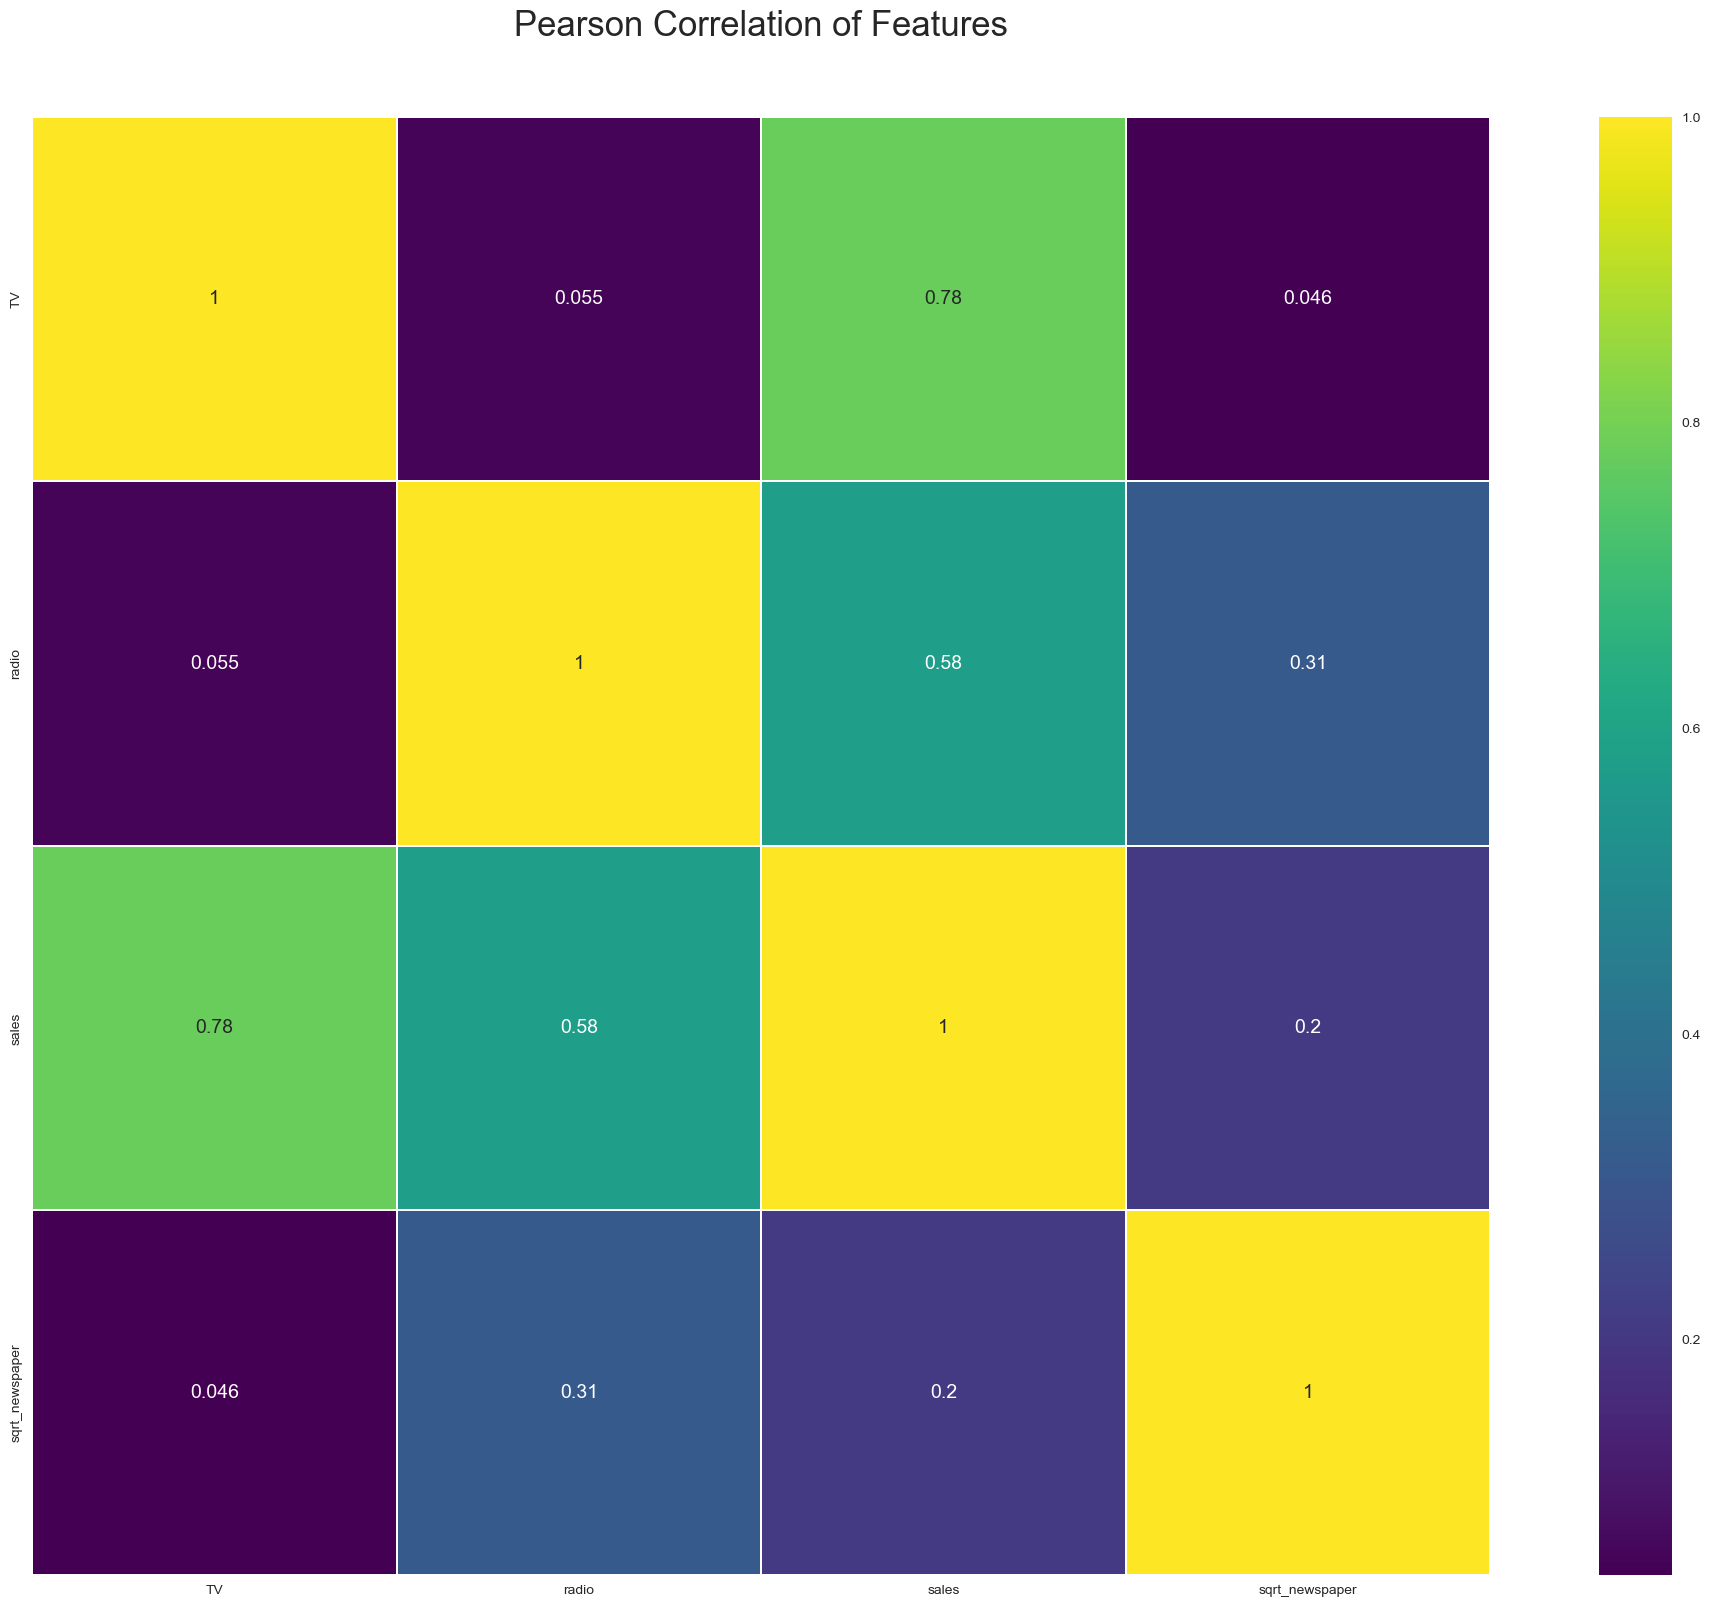

In [32]:


colormap = plt.cm.viridis
plt.figure(figsize=(25,18))
plt.title('Pearson Correlation of Features', y=1.05, size=25)
sns.heatmap(df_advert.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


* Looking at just the plots x vs. y plots, we can see that tv has the strongest linear relationship with sales, followed by radio, and then newspaper. The correlation plot aligns with the plots as well. If we look back at the summaries that we printed for each model, we see that all of the predictors have very low pvalues, meaning that all of them individually have a significant relationship with sales. We then have to look at the adj R2 since we have the same number of predictors for each model. This is where TV shines as the best predictor of sales becuase it is able to explain 61% of the variation in sales compared to radio at 33% and newpaper at 5%. 

## 2)ii  Fit a multiple regression model to predict the response using all of the predictors. Decide which predictors can be rejected by looking at the p-values. Write the multiple linear regression equation. Predict the sales for the new data point in which TV = 137, radio = 10, newspaper = 14.

In [33]:
y = df_advert['sales']
X_multi = df_advert[['TV','radio','sqrt_newspaper']]

#split the train test, here we are doing a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.3, random_state=42)

#reset the indices to ensure they match
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)


#fit the linear model
X_train = sm.add_constant(X_train)
lm_multi = sm.OLS(y_train, X_train).fit()
print(lm_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.88e-69
Time:                        14:59:55   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5403      0.462      5.

In [42]:
y = df_advert['sales']
X_multi = df_advert[['TV','radio']]

#split the train test, here we are doing a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.3, random_state=42)

#reset the indices to ensure they match
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer, StandardScaler

sc = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()
nm = Normalizer()

sc.fit(X_train)
sc.fit(X_test)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

#fit the linear model
X_train_sc = sm.add_constant(X_train_sc)
lm_multi = sm.OLS(y_train, X_train_sc).fit()
print(lm_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     651.3
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.06e-70
Time:                        15:02:48   Log-Likelihood:                -262.71
No. Observations:                 140   AIC:                             531.4
Df Residuals:                     137   BIC:                             540.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9476      0.144     89.815      0.0

TypeError: 'Series' object is not callable

In [35]:
# Make predictions on the test data
X_test = sm.add_constant(X_test)
y_pred = lm_multi.predict(X_test)

# Calculate evaluation metrics for the testing data
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
p_values = lm_multi.pvalues

print(p_values)
print('\n')
print(f"Mean Squared Error (MSE) on Test Data: {mse}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")
print(f"R-squared (R2) on Test Data: {r2}")

const    2.655081e-13
TV       3.815596e-57
radio    1.858762e-46
dtype: float64


Mean Squared Error (MSE) on Test Data: 3.6690470545306813
Root Mean Squared Error (RMSE) on Test Data: 1.9154756731764258
R-squared (R2) on Test Data: 0.8656253548947074


* As we can see, the multiple linear regression model does a great job of predicting sales according to our R2 which is 90%. Looking at the pvalues of our predictors, we can reject the null hypothesis that TV and radio should not be in the model, but we cannot reject the null hypothesis that newspaper shouldn't be in the model because it has such a high pvalue. This makes sense because we noticed that in the plot of newspaper vs sales, it did not appear to have a strong linear relationship with sales. With all of this said, we should removed newspaper from this model. 

* The linear equation for this model is sales = 2.54 + .0441 * TV + .1997 * radio + .0704 * sqrt_newspaper

In [36]:
TV = 137
radio = 10
sqrt_newspaper = np.sqrt(14)
sales = 2.54 + .0441 * TV + .1997 * radio + .0704 * sqrt_newspaper
print(f'Sales for this particular model: {sales:.2f}')

Sales for this particular model: 10.84


## Bonus: Create appropriate interactive visualizations for the exploration of results or for the multiple regression residuals to infer the new insights on your results. Please try to create a new visualization that we haven’t used in the class or previous HW on the same context.

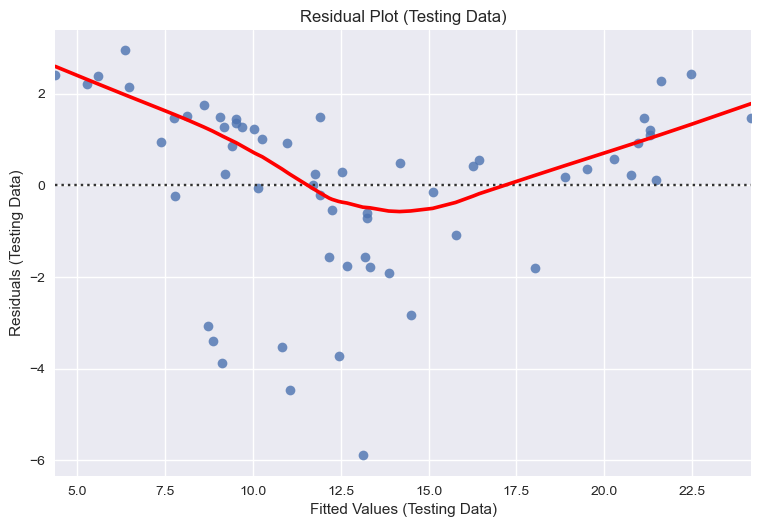

In [37]:
X_test = sm.add_constant(X_test)

# Calculate the residuals (observed - predicted) for the testing data
residuals = y_test - lm_multi.predict(X_test)

# Create the residuals vs. fitted values plot using Seaborn
sns.residplot(x=lm_multi.predict(X_test), y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values (Testing Data)')
plt.ylabel('Residuals (Testing Data)')
plt.title('Residual Plot (Testing Data)')
plt.show()


* We want to see no pattern and equal variation off the 0 y axis, but there is kind of a pattern which is not good. I think it might be ok though if we check out some of the other error plots. 

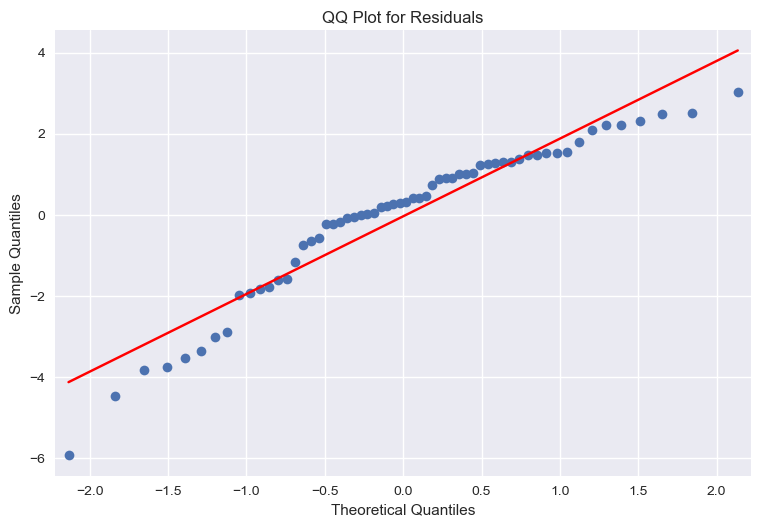

In [38]:
residuals = y_test - lm_multi.predict(X_test)


sm.qqplot(residuals, line='s')  
plt.title('QQ Plot for Residuals')
plt.show()

* Our qq plot has some tails going on which isn't great, but it is not too far off of the linear line. Overall, I think it is pretty decent though and normality is met. 

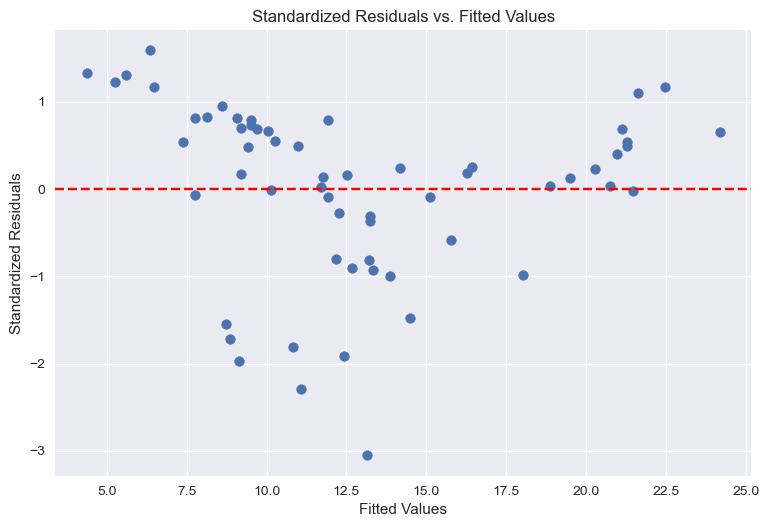

In [39]:
residuals = y_test - lm_multi.predict(X_test)
fitted_values = lm_multi.predict(X_test)

std_residuals = (residuals - residuals.mean()) / residuals.std()


plt.scatter(fitted_values, std_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs. Fitted Values')
plt.axhline(0, color='red', linestyle='--')  
plt.show()

* From the standardized vs residuals plot, we can see that we definitely have some outliers. An absolute value between 2-3 is high and over three is extreme. We would need to investigate these points further to see why these occured in the data set. 

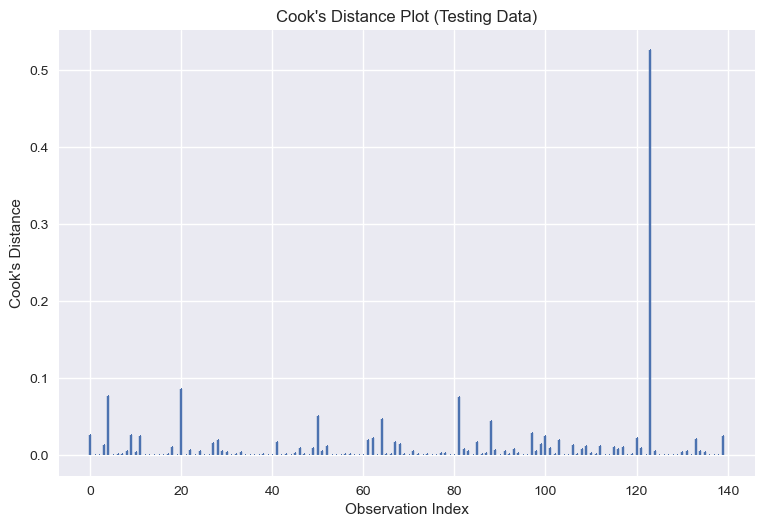

In [40]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Make predictions on the testing data
y_pred_test = lm_multi.predict(X_test)

# Calculate residuals for the testing data
residuals_test = y_test - y_pred_test

# Create an OLSInfluence object for the testing data
influence_test = OLSInfluence(lm_multi)

# Calculate Cook's Distance for the testing data
cook_d2_test = influence_test.cooks_distance

# Create a Cook's Distance plot for the testing data
plt.stem(np.arange(len(cook_d2_test[0])), cook_d2_test[0], markerfmt=",", basefmt=" ", use_line_collection=True)
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot (Testing Data)")
plt.show()

* A value of over .5 is a highly influential point, and we do appear to have one. We would need to find this point and investigate further.  